# Initialize

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://drive.google.com/file/d/1AE26XgRXs8ddcc7poqkQKtBH2f9adv2R/view?usp=sharing"
path = "https://drive.google.com/uc?export=download&id=" + url.split("/")[-2]

df = pd.read_csv(path)

df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


# 2. Illustrate the distribution of math scores across different race/ethnicity groups. What observations can be made from this scatter plot?

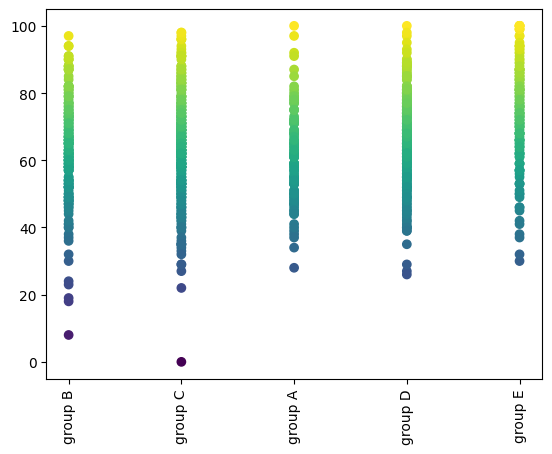

In [16]:
data = df

fig, ax = plt.subplots()

ax.scatter("race/ethnicity", "math score", data=data, c=data["math score"])
plt.xticks(rotation=90)

plt.show()

# 4. Visualize the distribution of reading scores across different race/ethnicity groups using a violin plot. How does this visualization help understand the variations in reading performance among different demographic categories?

In [139]:
def violin_plotter(axes, data, group):
  axes.violinplot(data[data['race/ethnicity'] == group]['reading score'], showmeans=True, showextrema=True, showmedians=True, widths=1, vert=False)

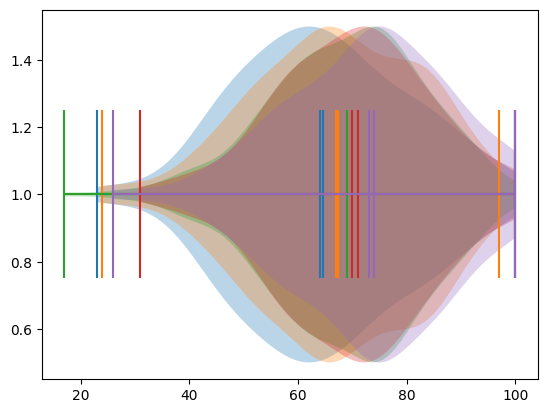

<Figure size 2000x2000 with 0 Axes>

In [140]:
data = df

fig, axs = plt.subplots()
plt.figure(figsize=(20, 20))

violin_plotter(axs, data, "group A")
violin_plotter(axs, data, "group B")
violin_plotter(axs, data, "group C")
violin_plotter(axs, data, "group D")
violin_plotter(axs, data, "group E")

plt.show()

# 6. Displaying the distribution of math scores across various race/ethnicity groups. How does this visualization highlight any disparities or trends in math performance among different demographic categories?

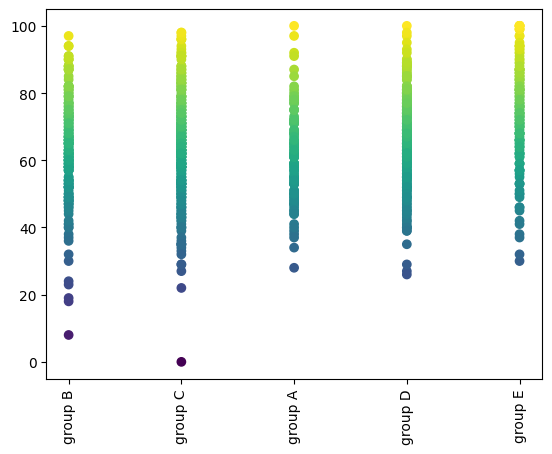

In [141]:
data = df

fig, ax = plt.subplots()

ax.scatter("race/ethnicity", "math score", data=data, c=data["math score"])
plt.xticks(rotation=90)

plt.show()

# 8. Create a visualization illustrating the distribution of student across different race/ethnicity groups. What observations can be made regarding the racial and ethnic composition of the student population?

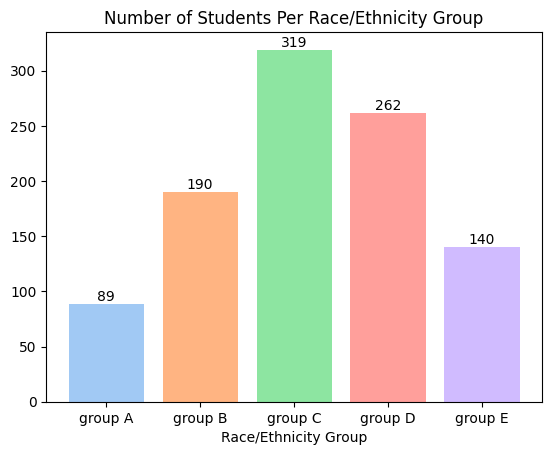

In [178]:
data = df

race = data.groupby("race/ethnicity")['race/ethnicity'].count()

fig, ax = plt.subplots()

bar_container = ax.bar(race.index, race, color=sns.color_palette("pastel"))
plt.bar_label(bar_container, fmt='{:,.0f}')
plt.title("Number of Students Per Race/Ethnicity Group")
plt.xlabel("Race/Ethnicity Group")

plt.show()

# 10. Visualize the distribution of math pass/fail status across different parental levels of education. What insights can be derived regarding the relationship between parental education and students' math perfomance?

C:\Users\samur\AppData\Local\Temp\ipykernel_21248\3025385443.py:12: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(scores.index, rotation=45)


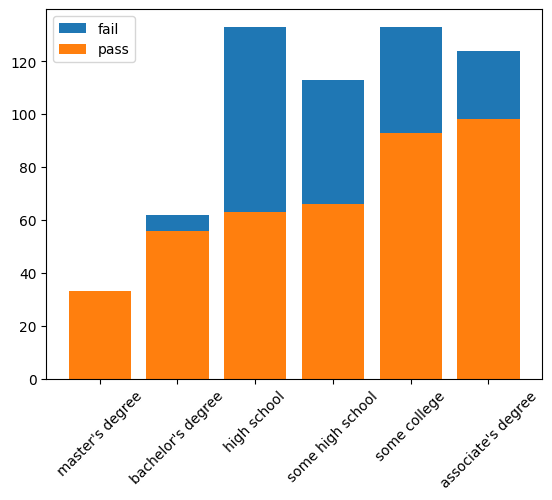

In [238]:
data = df

fig, ax = plt.subplots()

data['pass_fail'] = np.where(data['math score'] >= 70, 'pass', 'fail')

scores = data.groupby(['parental level of education', "pass_fail"])['pass_fail'].count().unstack().sort_values(by="pass")

ax.bar(scores.index, scores['fail'], label='fail')
ax.bar(scores.index, scores['pass'], label='pass')

ax.set_xticklabels(scores.index, rotation=45)

ax.legend()

plt.show()